# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [8]:
import sys
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

sys.path.append('../Data/')
from load_data import get_input_data
from utils import search_optimal_params

# viz configs
from matplotlib import rcParams
import seaborn as sns
rcParams["figure.figsize"] = 25, 8
rcParams["timezone"] = "UTC"
sns.set_style("whitegrid")

## Model Choice

Auto regressive Integrated Moving Average(ARIMA) models are classical statistical models. These models are used to assess the dataset, initial modeling and ultimately comparison against advanced and more SOTA models.

Considering **Seasonal ARIMA**


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


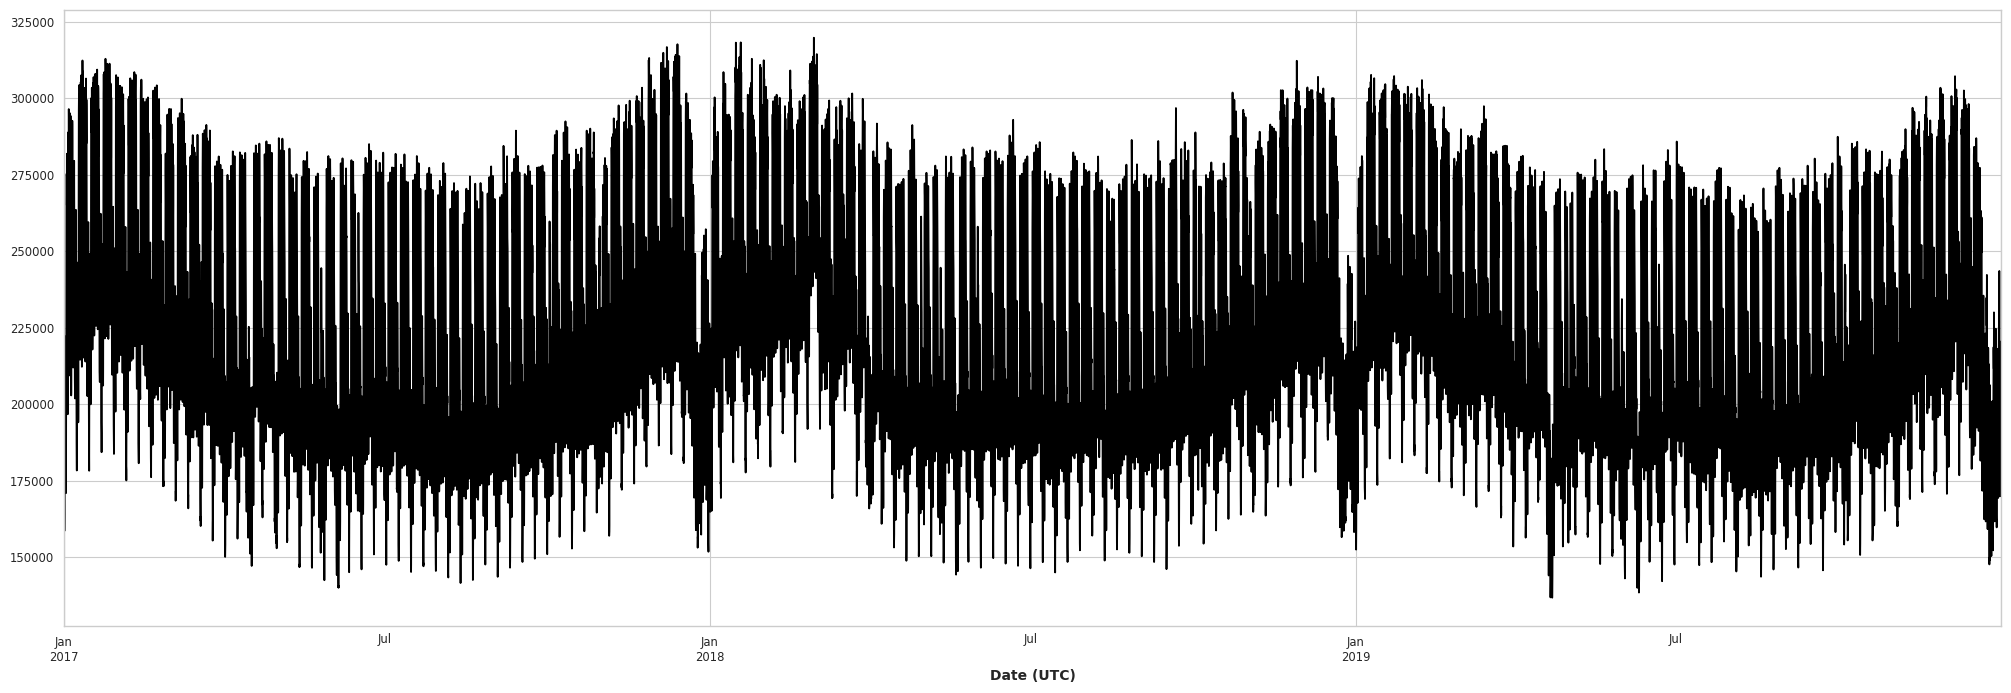

In [16]:
data_frame = get_input_data()["Load"]
data_frame.plot()
plt.show()

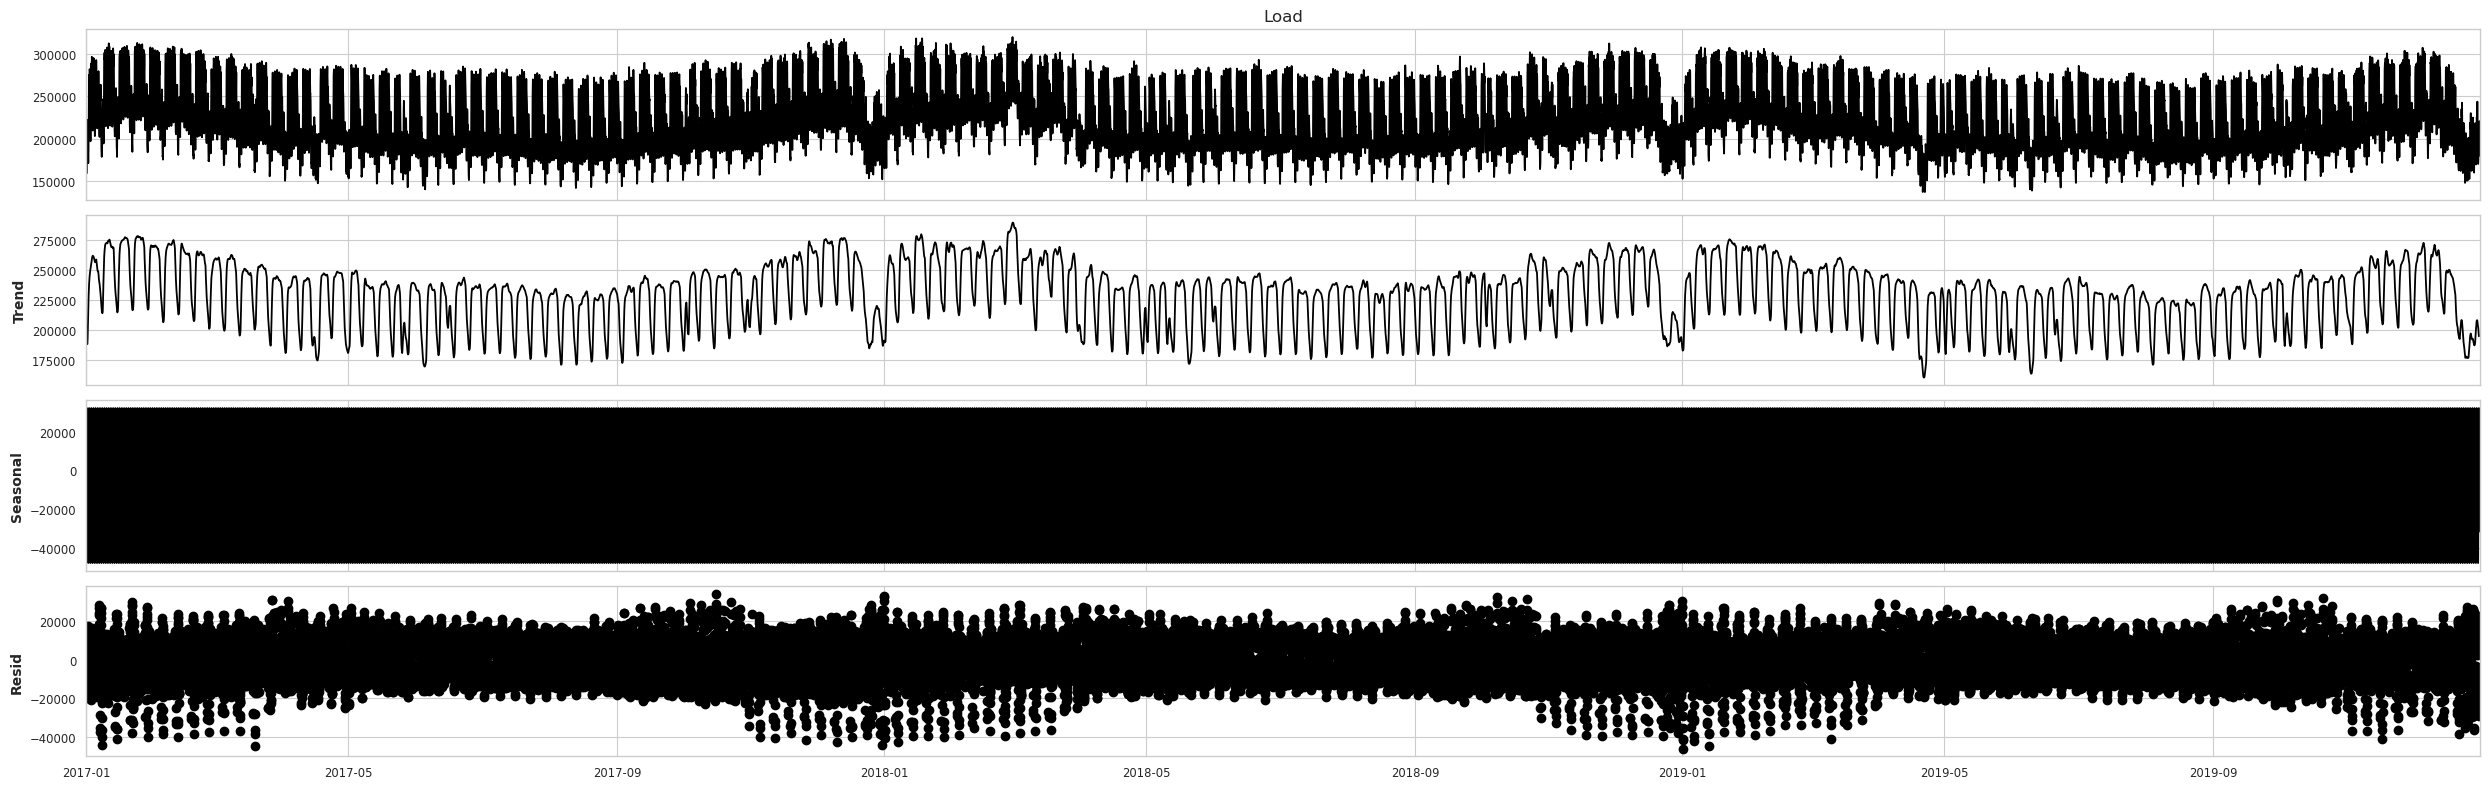

In [20]:
decomposition = sm.tsa.seasonal_decompose(data_frame, model='additive', period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()
plt.show()

In [21]:
# check stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test : if p-value < 0.05, data is stationary
result = adfuller(data_frame)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


# KPSS Test : if p-value < 0.05, data is not stationary
result = kpss(data_frame)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -16.701692793535553
p-value: 1.459404850042925e-29
Critical Values:
	1%: -3.43059933054021
	5%: -2.861650196777599
	10%: -2.566828654483077
KPSS Statistic: 0.9723238336468497
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


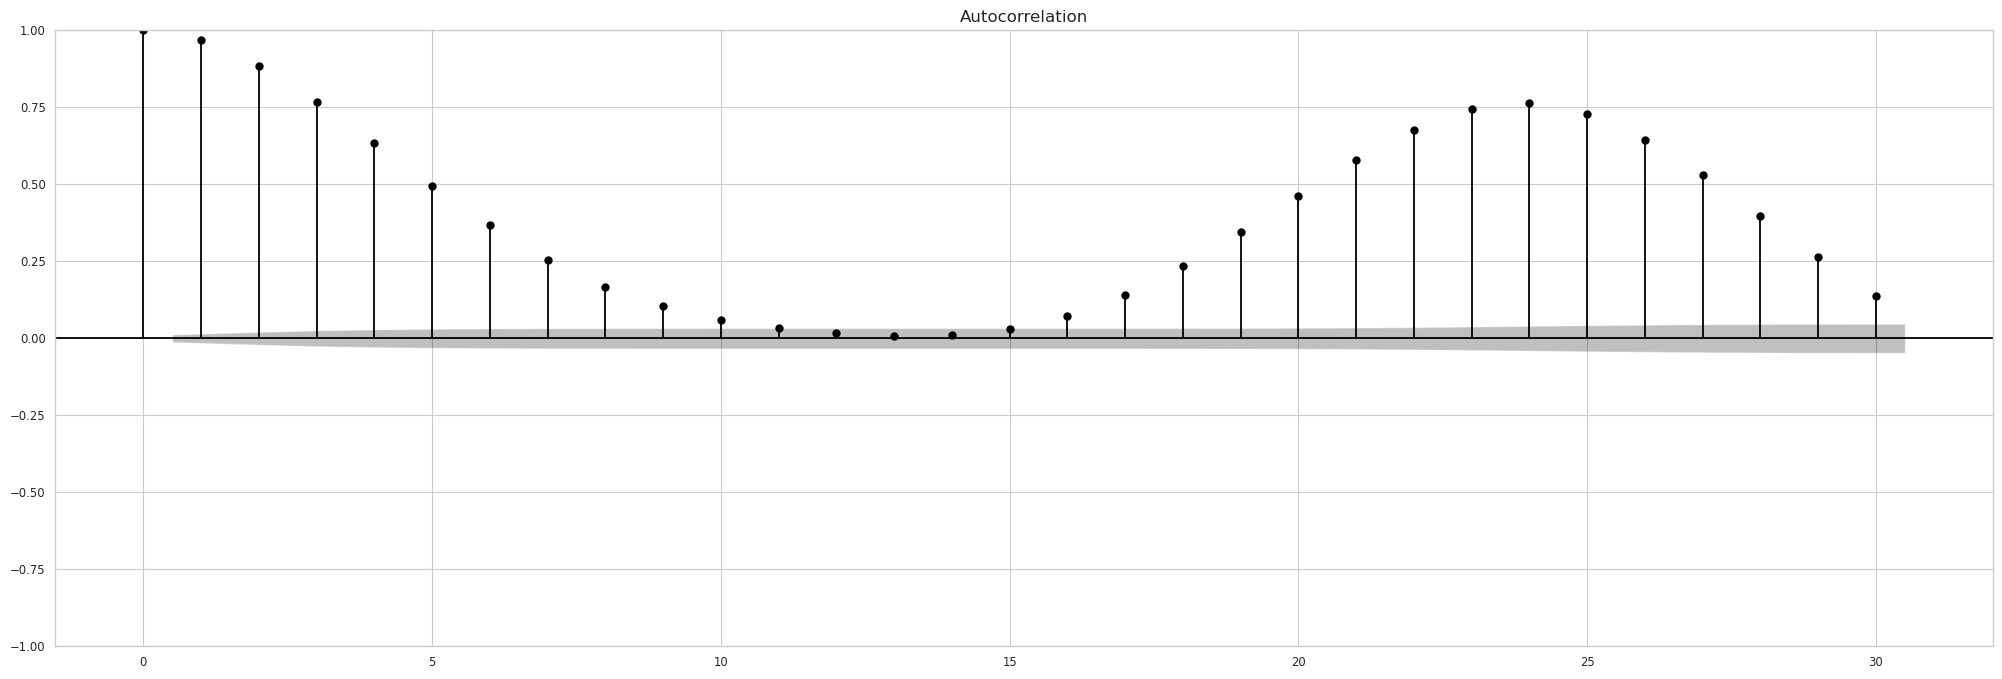

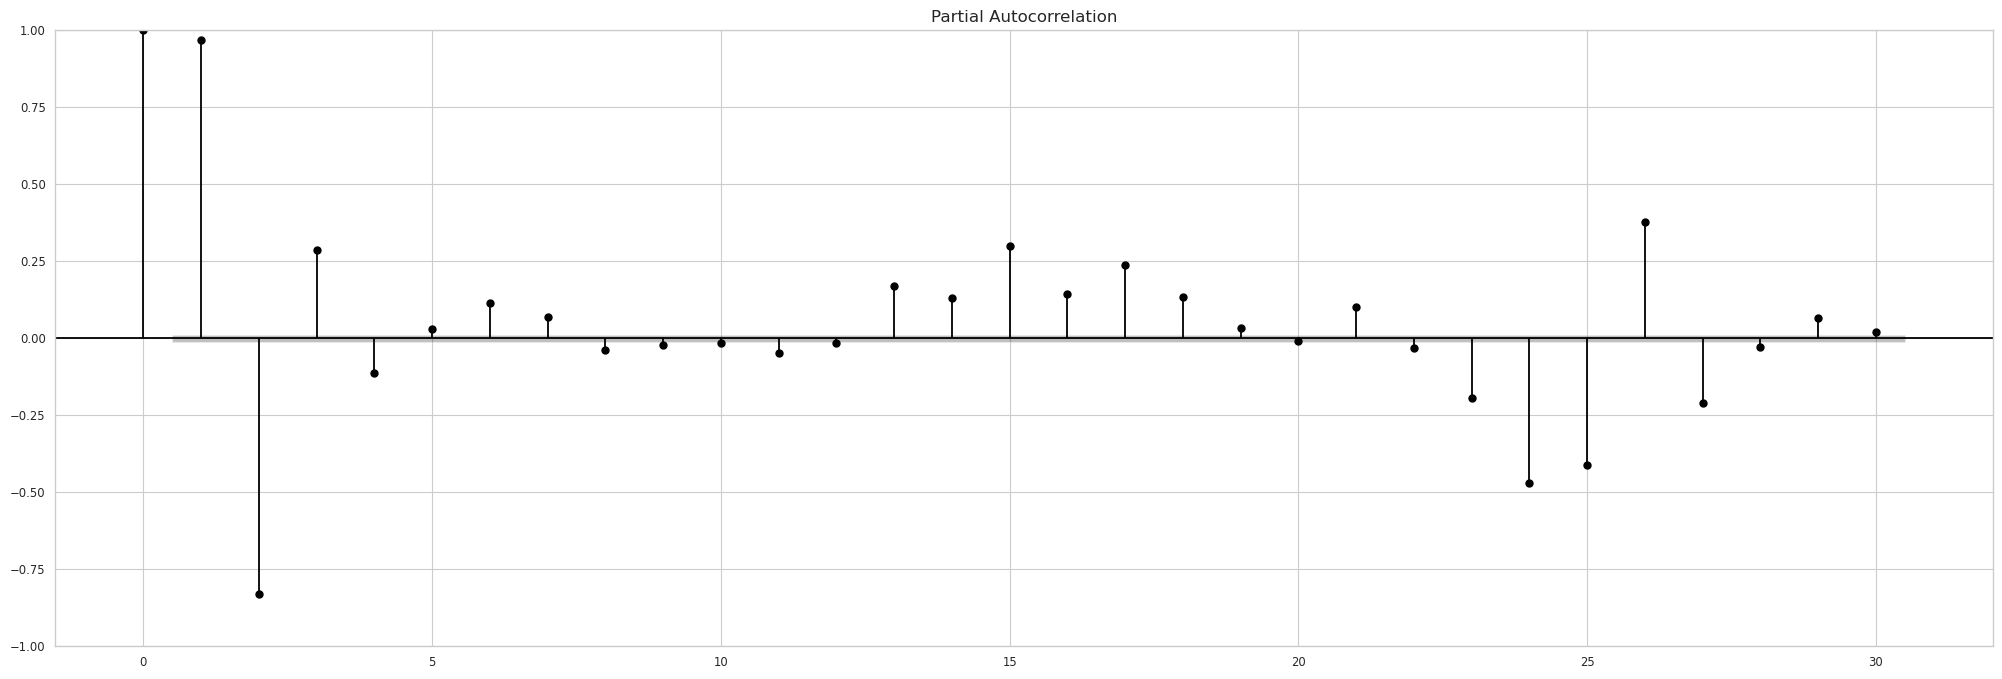

In [23]:
# check autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_frame, lags=30)
plt.show()

plot_pacf(data_frame, lags=30)
plt.show()

In [19]:
# train test split
split_point = int(len(data_frame) * 0.8)
train_set, test_set = data_frame[:split_point], data_frame[split_point:]
print("train set: {}, test set: {}".format(len(train_set), len(test_set)))

train set: 21024, test set: 5256


## Implementation

**Grid Search | Parameter Optimization**

```python
warnings.filterwarnings("ignore")

p_values = range(0, 2)  # Autoregressive order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 2)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [24]         # Seasonal period : daily

param_combinations = list(itertools.product(
    p_values, d_values,  q_values,
    P_values, D_values,  Q_values,
    m_values
))

best_params, best_aic = search_optimal_params(param_combinations, train_set["Load"])
print("Best AIC: {:.2f} | Best params: {}".format(best_aic, best_params))
```

In [24]:
best_params = [1, 0, 0, 1, 0, 1, 24]

In [ ]:
model = sm.tsa.SARIMAX(
    train_set, order=best_params[:3], seasonal_order=best_params[3:]
)
results = model.fit(disp=False)
results.summary()


## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [ ]:
# Evaluate the baseline model
# Example for a classification problem
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# For a regression problem, you might use:
# mse = mean_squared_error(y_test, y_pred)

# Your evaluation code here
